<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/LINEAR_MULTIPLE_LINEAR_REGRESSION_Medical_Cost_Personal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SIMPLE LINEAR AND MULTIPLE LINEAR REGRESSION ASSIGNMENT
#Medical Cost Personal Datasets
# [https://www.kaggle.com/datasets/mirichoi0218/insurance/data]
#Use the dataset to predict medical insurance costs based on individual attributes like age, BMI,
# smoking status, region, etc..

#Step 1: Setup and Data Preparation
#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#2. Load the Dataset
# Load the dataset
data = pd.read_csv("insurance.csv")

# Display first 5 rows
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#3. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.09818

In [4]:
#4. Handle Missing Values
#If there are missing values:
# Fill missing values with mode (for categorical) or mean (for numerical)
for column in data.columns:
    if data[column].isnull().any():  # Check if column has NaN values
        if data[column].dtype == 'object':  # Categorical columns
            data[column] = data[column].fillna(data[column].mode()[0])
        else:  # Numerical columns
            data[column] = data[column].fillna(data[column].mean())

In [5]:
#5. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#Label Encoding :
#For binary categorical variables (sex, smoker):

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to binary categorical columns
label_encoder = LabelEncoder()
binary_columns = ['sex', 'smoker']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display updated dataset
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [6]:
#One-Hot Encoding :
#For nominal categorical variables (region):
# Perform one-hot encoding for categorical variables
categorical_columns = ['region']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print(data_encoded.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


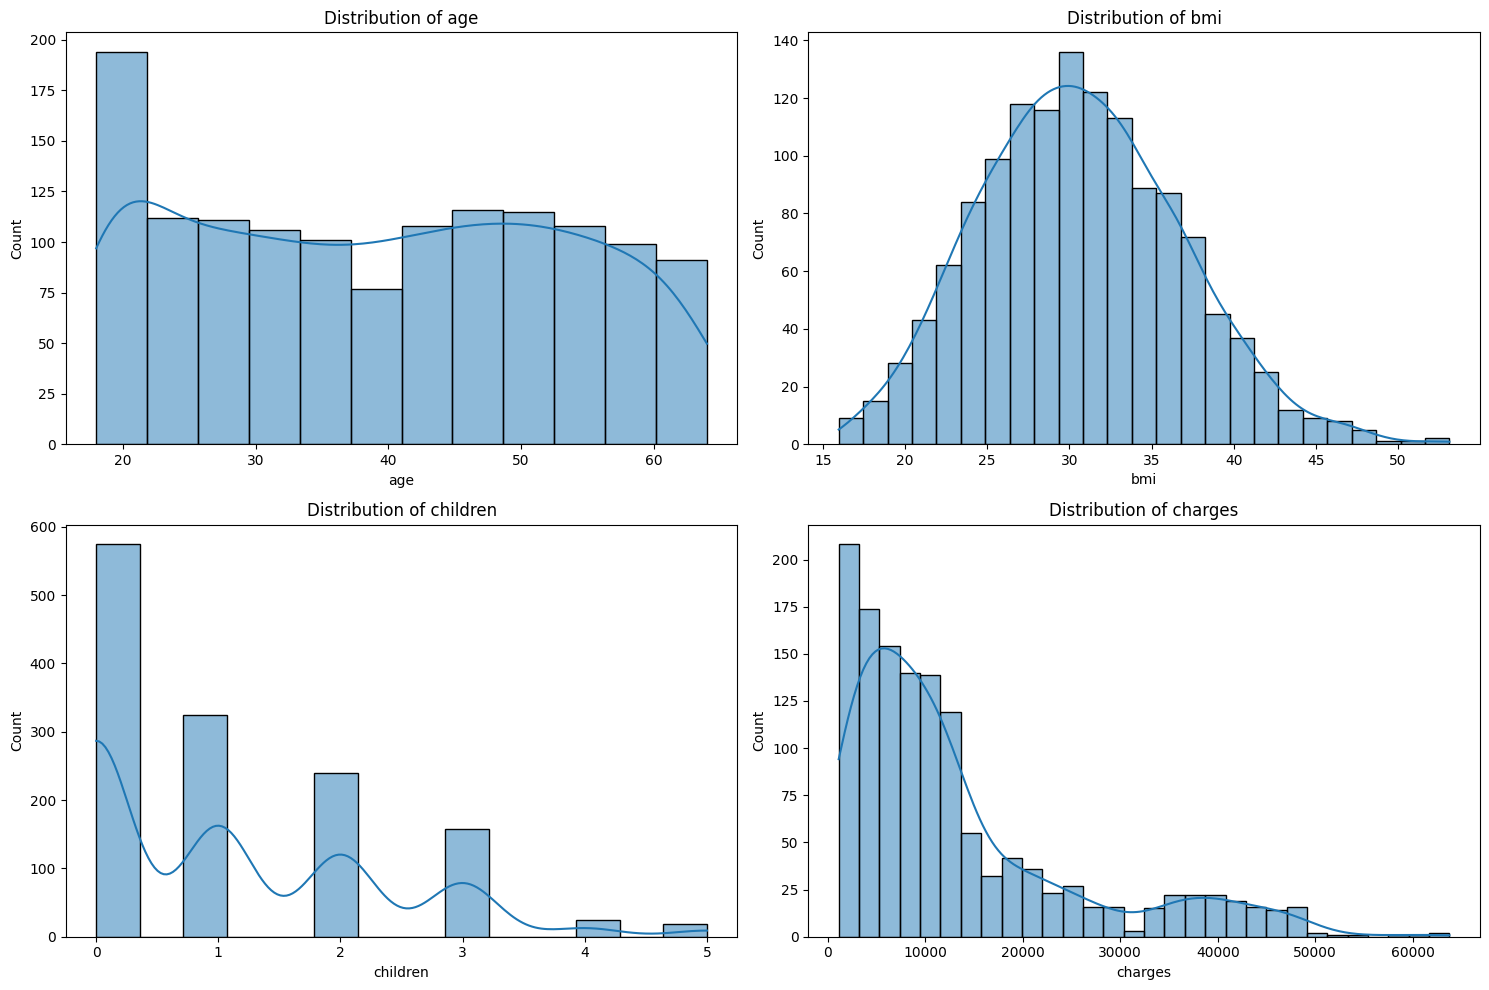

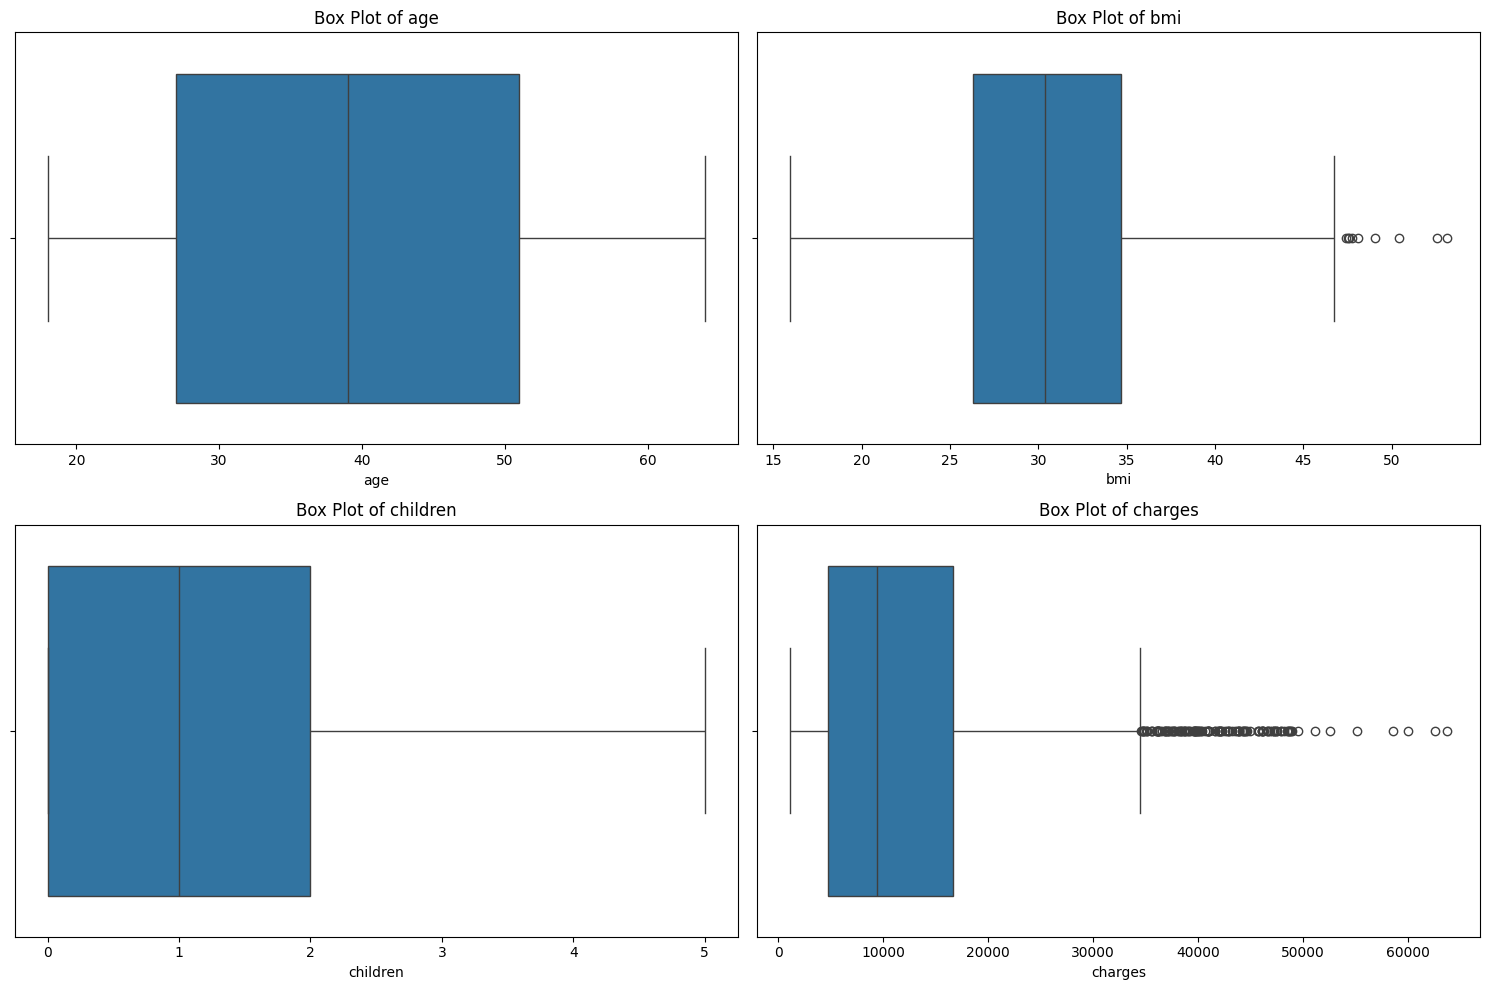

In [7]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

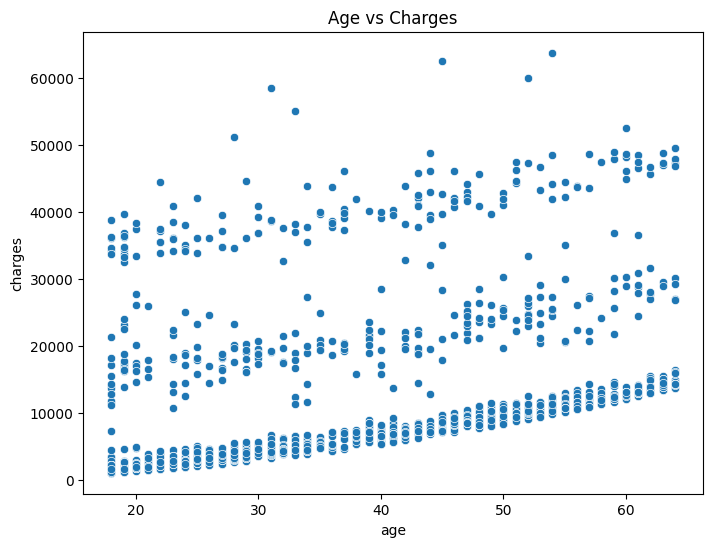

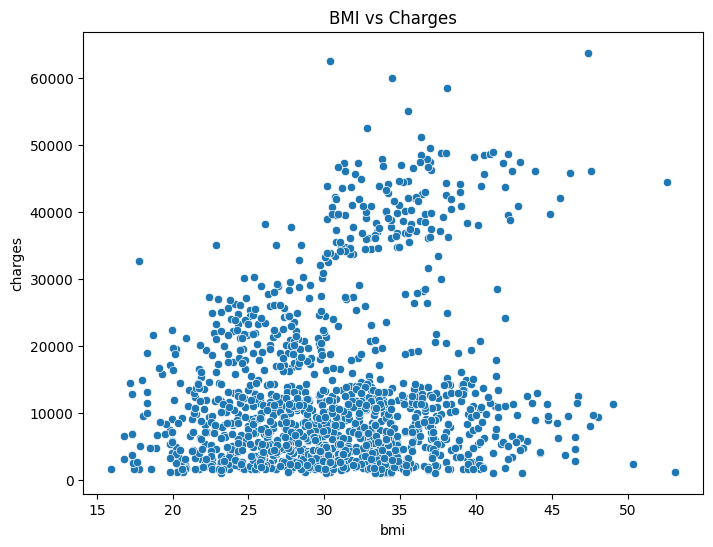

In [8]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot: Age vs Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()

# Scatter plot: BMI vs Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()

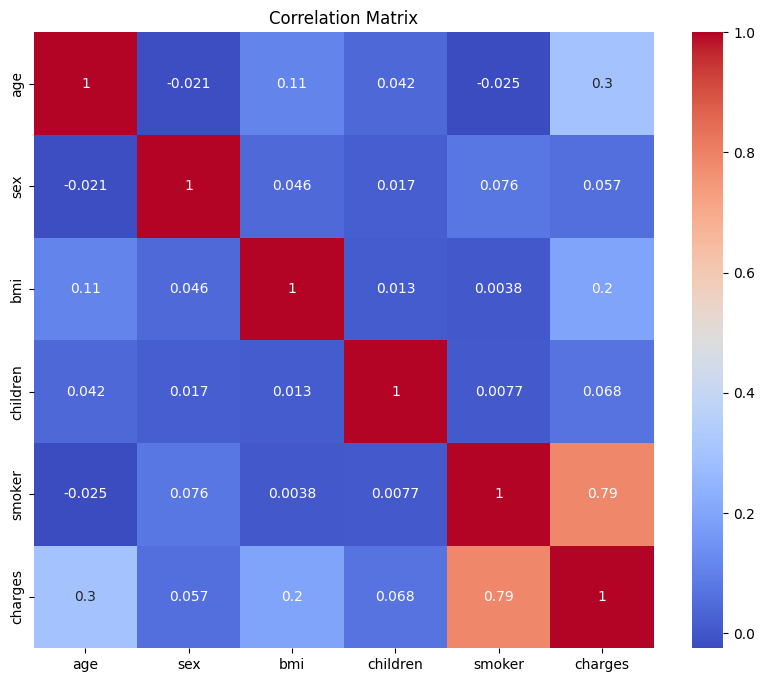

In [9]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.
import pandas as pd

# Load the dataset
data = pd.read_csv("insurance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Detect outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Column names in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data types of columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Original shape: (1338, 7)
Cleaned shape: (1193, 7)


In [14]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("insurance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display scaled data
print("\nScaled dataset:")
print(scaled_data.head())

Column names in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data types of columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Scaled dataset:
        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.441948 -1.305531 -0.908614  0.719843
4 -0.513149 -0.292556 -0.908614 -0.776802



Simple Linear Regression Performance:
Mean Squared Error: 36774490.85
Mean Absolute Error: 4804.77
R-squared: 0.23


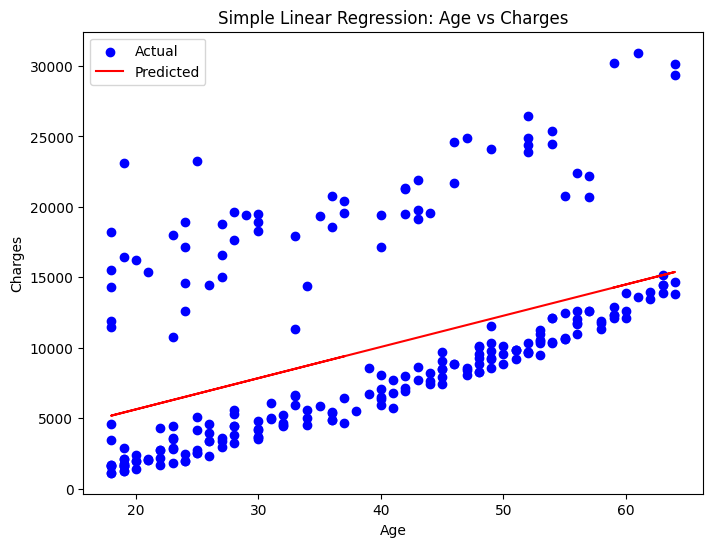

In [15]:
#Step 4: Model Construction
#1. Simple Linear Regression
#Train a model using one independent variable (e.g., age) and one dependent variable (charges).

# Define features (X) and target (y)
X_simple = data_cleaned[['age']]  # Independent variable
y = data_cleaned['charges']       # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train a Simple Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Make predictions
y_pred_simple = model_simple.predict(X_test)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression Performance:")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted')
plt.title('Simple Linear Regression: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [17]:
#2. Multiple Linear Regression
#Train a model using multiple independent variables (e.g., age, bmi, smoker) and one dependent variable (charges).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("insurance.csv")

# Define features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Perform one-hot encoding for categorical variables
categorical_columns = ['sex', 'smoker', 'region']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure both datasets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Multiple Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train_scaled, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test_scaled)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression Performance:")
print(f"Mean Squared Error: {mse_multiple:.2f}")
print(f"Mean Absolute Error: {mae_multiple:.2f}")
print(f"R-squared: {r2_multiple:.2f}")


Multiple Linear Regression Performance:
Mean Squared Error: 33596915.85
Mean Absolute Error: 4181.19
R-squared: 0.78


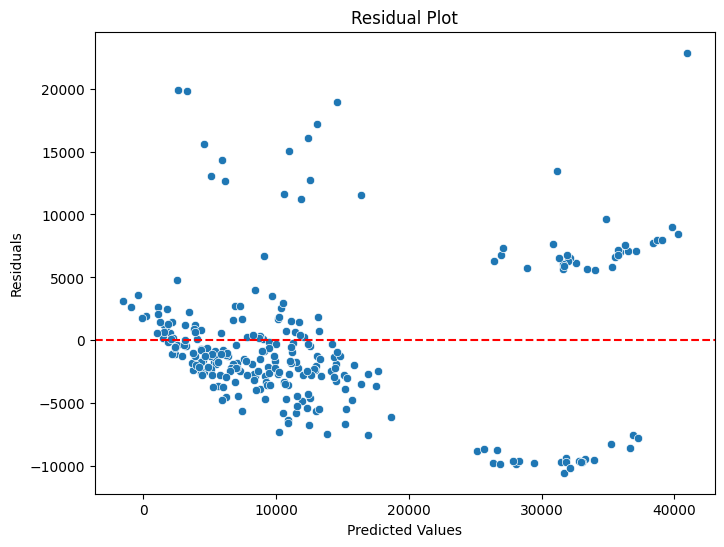

In [18]:
#Step 5: Residual Analysis
#Residual Plot
# Residual plot for Multiple Linear Regression
residuals = y_test - y_pred_multiple
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_multiple, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Column names in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data types of columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


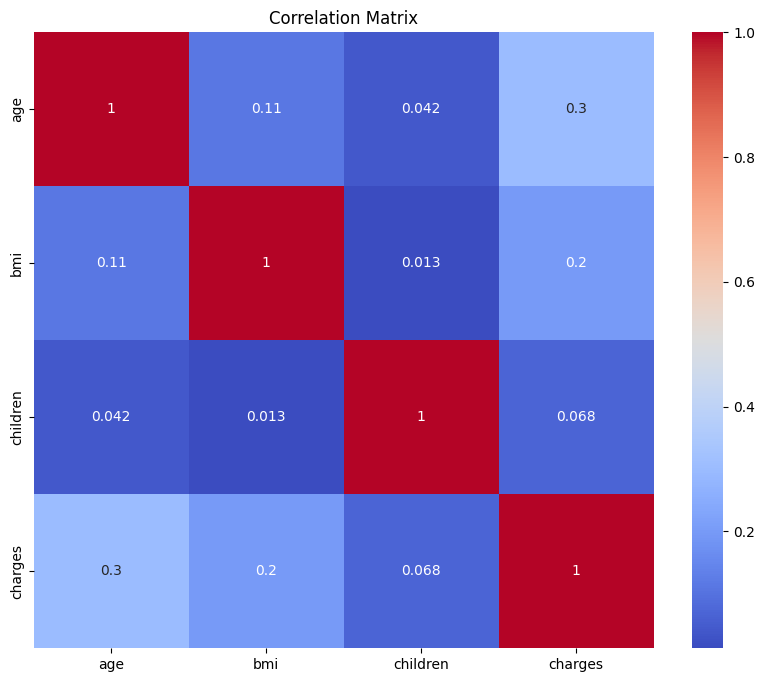

In [20]:
#Step 6: Model Optimization and Insights
#Feature Selection
#Remove irrelevant or highly correlated predictors to improve the model's performance.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("insurance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Analyze correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()